In [1]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

yelp_reviews = pd.read_csv("TamimiMarketProduct.csv", encoding='UTF-8')
yelp_reviews.head()
df= pd.DataFrame(yelp_reviews)

In [2]:
# Clean shop names from extra words and unify them
i=0
#-------name-----
for row in df['Name']:
    d= df['Name'][i].replace(df['Name'][i][0:2], "")
    df.loc[i, 'Name']=d
    length=len(df['Name'][i])
    if '-' in df['Name'][i] :
        postion= df['Name'][i].find('-')
        d= df['Name'][i].replace(df['Name'][i][postion:length], "")
        df.loc[i, 'Name']=d  
    if '\'' in df['Name'][i] :
        postion= df['Name'][i].find('\'')
        d= df['Name'][i].replace(df['Name'][i][postion:length], "")
        df.loc[i, 'Name']=d
        
#-------price----- 
    try:
        if type(df["Price"][i]) != float :
            price=[float(s) for s in re.findall(r'-?\d+\.?\d*', df["Price"][i])]    
            pd.to_numeric(price[0])
            df.loc[i,"Price"]=price[0]
        else:
            df.loc[i,"Price"]=0.0
    except IndexError:
        print(i)  
        
#-------Brand-----
    d= df['Brand'][i].replace(df['Brand'][i][0:2], "")
    df.loc[i, 'Brand']=d
    length=len(df['Brand'][i])
    if '\'' in df['Brand'][i] :
        postion= df['Brand'][i].find('\'')
        d= df['Brand'][i].replace(df['Brand'][i][postion:length], "")
        df.loc[i, 'Brand']=d
        
#-------Offer-----
    d= df['Offer'][i].replace(df['Offer'][i][0:2], "")
    df.loc[i, 'Offer']=d
    length=len(df['Offer'][i])
    if '\'' in df['Offer'][i] :
        postion= df['Offer'][i].find('\'')
        d= df['Offer'][i].replace(df['Offer'][i][postion:length], "")
        df.loc[i, 'Offer']=d
    try:
        price=[float(s) for s in re.findall(r'-?\d+\.?\d*', df["Offer"][i])]
        pd.to_numeric(price[0])
        df.loc[i,"Offer"]=float(price[0])
    except IndexError:
        df.loc[i,"Offer"]=0.0
        
        
    i=i+1
    if(i==21198 ):
        break
    
df

5850


,Category,Name,Price,Brand,Offer
0,breakfast,Chunky Peanut Butter,9.95,Goody,14.95
1,breakfast,Corn Flakes,9.5,Kellogg,15.95
2,breakfast,Creamy Peanut Butter,9.95,Goody,14.95
3,breakfast,The Original Corn Flakes,9.7,Kellogg,0
4,breakfast,Special K Original Wheat Cereal,22.55,Kellogg,0
...,...,...,...,...,...
21193,pets,Food Chicken And Tuna,18.65,Cutey,0
21194,pets,Litter Lemon Scented,19.7,Cutey,0
21195,pets,Hairball control,42.95,Meow Mix,0
21196,pets,Aquadine Anti,16.55,Aquadine,0


1.	Which category has the highest price? 

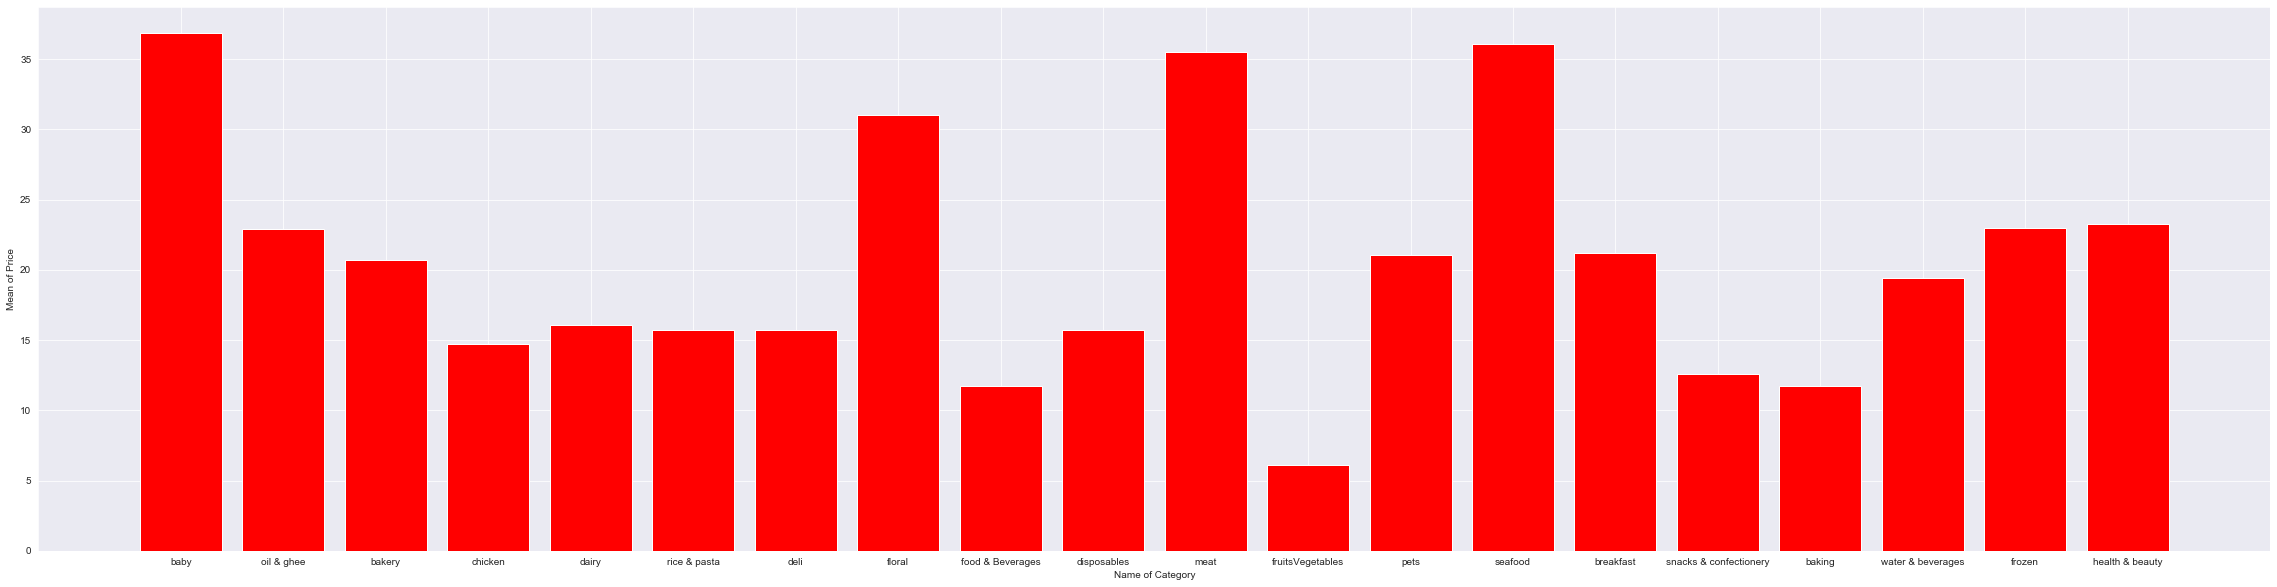

In [3]:
df1 = df.pivot(columns='Category',values='Price') # to Know the Category names 

keysValues= {'baby':df1['baby'].mean(),
             'oil & ghee':df1['oil--ghee'].mean(),
             'bakery':df1['bakery'].mean(),
             'chicken':df1['chicken'].mean(),
             'dairy': df1['dairy'].mean(),
             'rice & pasta':df1['rice--pasta'].mean(),
             'deli':df1['deli'].mean(),
             'floral':df1['floral'].mean(),
             'food & Beverages':df1['food--beverages'].mean(),
             'disposables':df1['disposables'].mean(),
             'meat':df1['meat'].mean(),
             'fruitsVegetables':df1['fruits--vegetables'].mean(),
             'pets':df1['pets'].mean(),
             'seafood':df1['seafood'].mean(),
             'breakfast':df1['breakfast'].mean(),
             'snacks & confectionery':df1['snacks--confectionery'].mean(),
             'baking':df1['baking'].mean(),
             'water & beverages':df1['water--beverages'].mean(),
             'frozen':df1['frozen'].mean(),
             'health & beauty':df1['health--beauty'].mean()      
            }

keys =keysValues.keys()
values = keysValues.values()

fig, axs = plt.subplots(1, 1, figsize=(40,10), sharey=True)
plt.bar(keys, values,  color='r')
plt.ylabel ('Mean of Price')
plt.xlabel ('Name of Category')

plt.show()

2.	Which product category has the most offers?

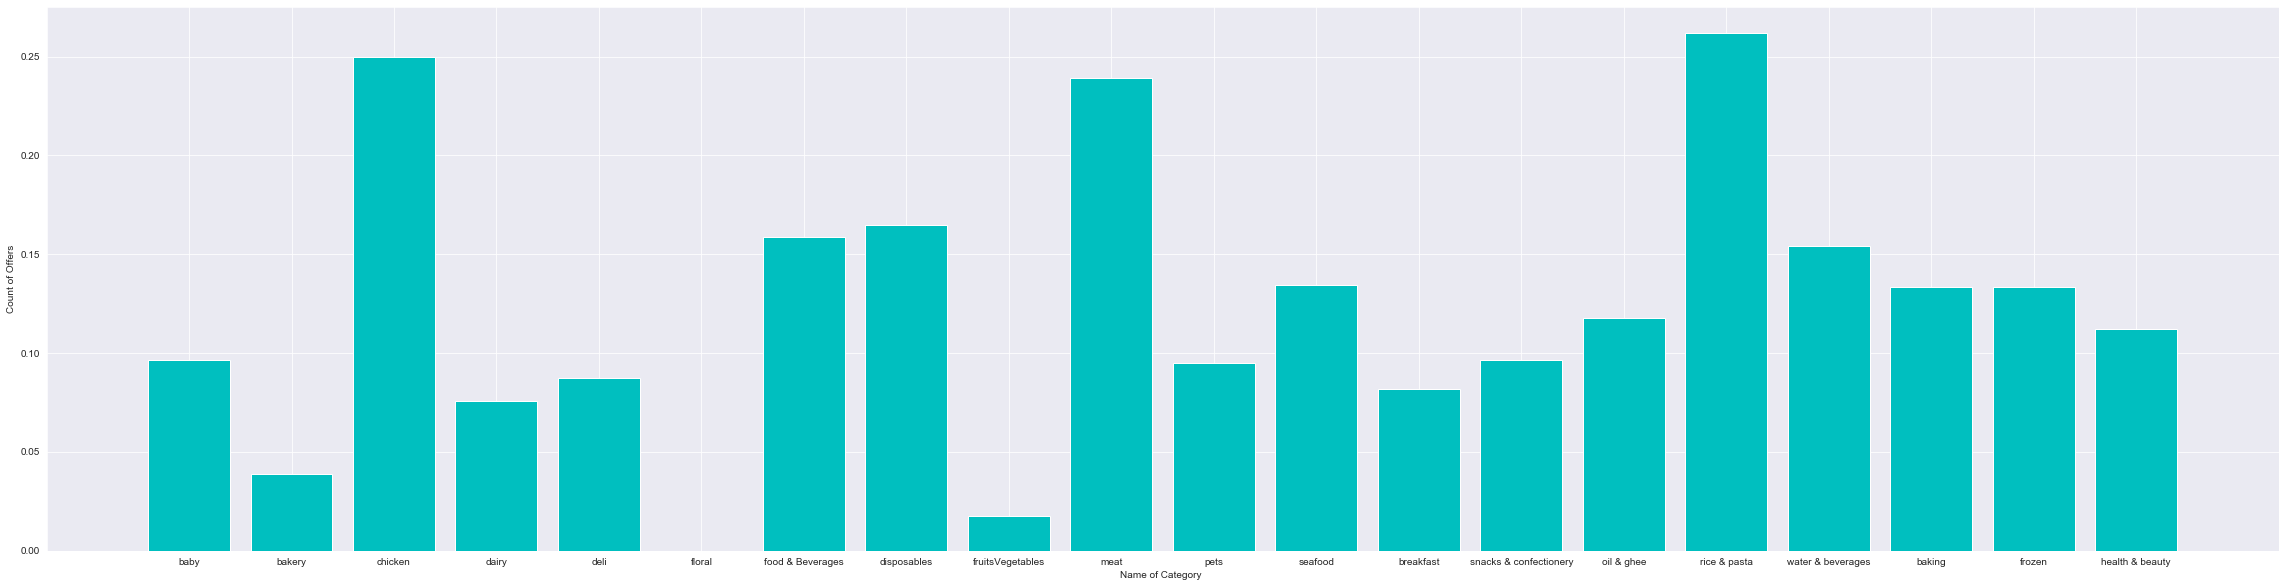

In [5]:

keysValues= {'baby':df[(df['Category'] == 'baby')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'baby'].shape[0],
             'bakery':df[(df['Category'] == 'bakery')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'bakery'].shape[0],
             'chicken':df[(df['Category'] == 'chicken')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'chicken'].shape[0],
             'dairy': df[(df['Category'] == 'dairy')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'dairy'].shape[0],
             'deli':df[(df['Category'] == 'deli')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'deli'].shape[0],
             'floral':df[(df['Category'] == 'floral')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'floral'].shape[0],
             'food & Beverages':df[(df['Category'] == 'food--beverages')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'food--beverages'].shape[0],
             'disposables':df[(df['Category'] == 'disposables')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'disposables'].shape[0],
             'fruitsVegetables':df[(df['Category'] == 'fruits--vegetables')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'fruits--vegetables'].shape[0],
             'meat':df[(df['Category'] == 'meat')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'meat'].shape[0],
             'pets':df[(df['Category'] == 'pets')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'pets'].shape[0],
             'seafood':df[(df['Category'] == 'seafood')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'seafood'].shape[0],
             'breakfast':df[(df['Category'] == 'breakfast')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'breakfast'].shape[0],
             'snacks & confectionery':df[(df['Category'] == 'snacks--confectionery')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'snacks--confectionery'].shape[0],
             'oil & ghee':df[(df['Category'] == 'oil--ghee')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'oil--ghee'].shape[0],
             'rice & pasta':df[(df['Category'] == 'rice--pasta')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'rice--pasta'].shape[0],
             'water & beverages':df[(df['Category'] == 'water--beverages')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'water--beverages'].shape[0],
             'baking':df[(df['Category'] == 'baking')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'baking'].shape[0],
             'frozen':df[(df['Category'] == 'frozen')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'frozen'].shape[0],
             'health & beauty':df[(df['Category'] == 'health--beauty')&(df['Offer'] != 0)].shape[0]/df[df['Category'] == 'health--beauty'].shape[0]      
            }

keys =keysValues.keys()
values = keysValues.values()
fig, axs = plt.subplots(1, 1, figsize=(40, 10), sharey=True)
plt.bar(keys, values,  color='c')
plt.ylabel ('Count of Offers')
plt.xlabel ('Name of Category ')

plt.show()

3.	What is the brand that gives more offers? 

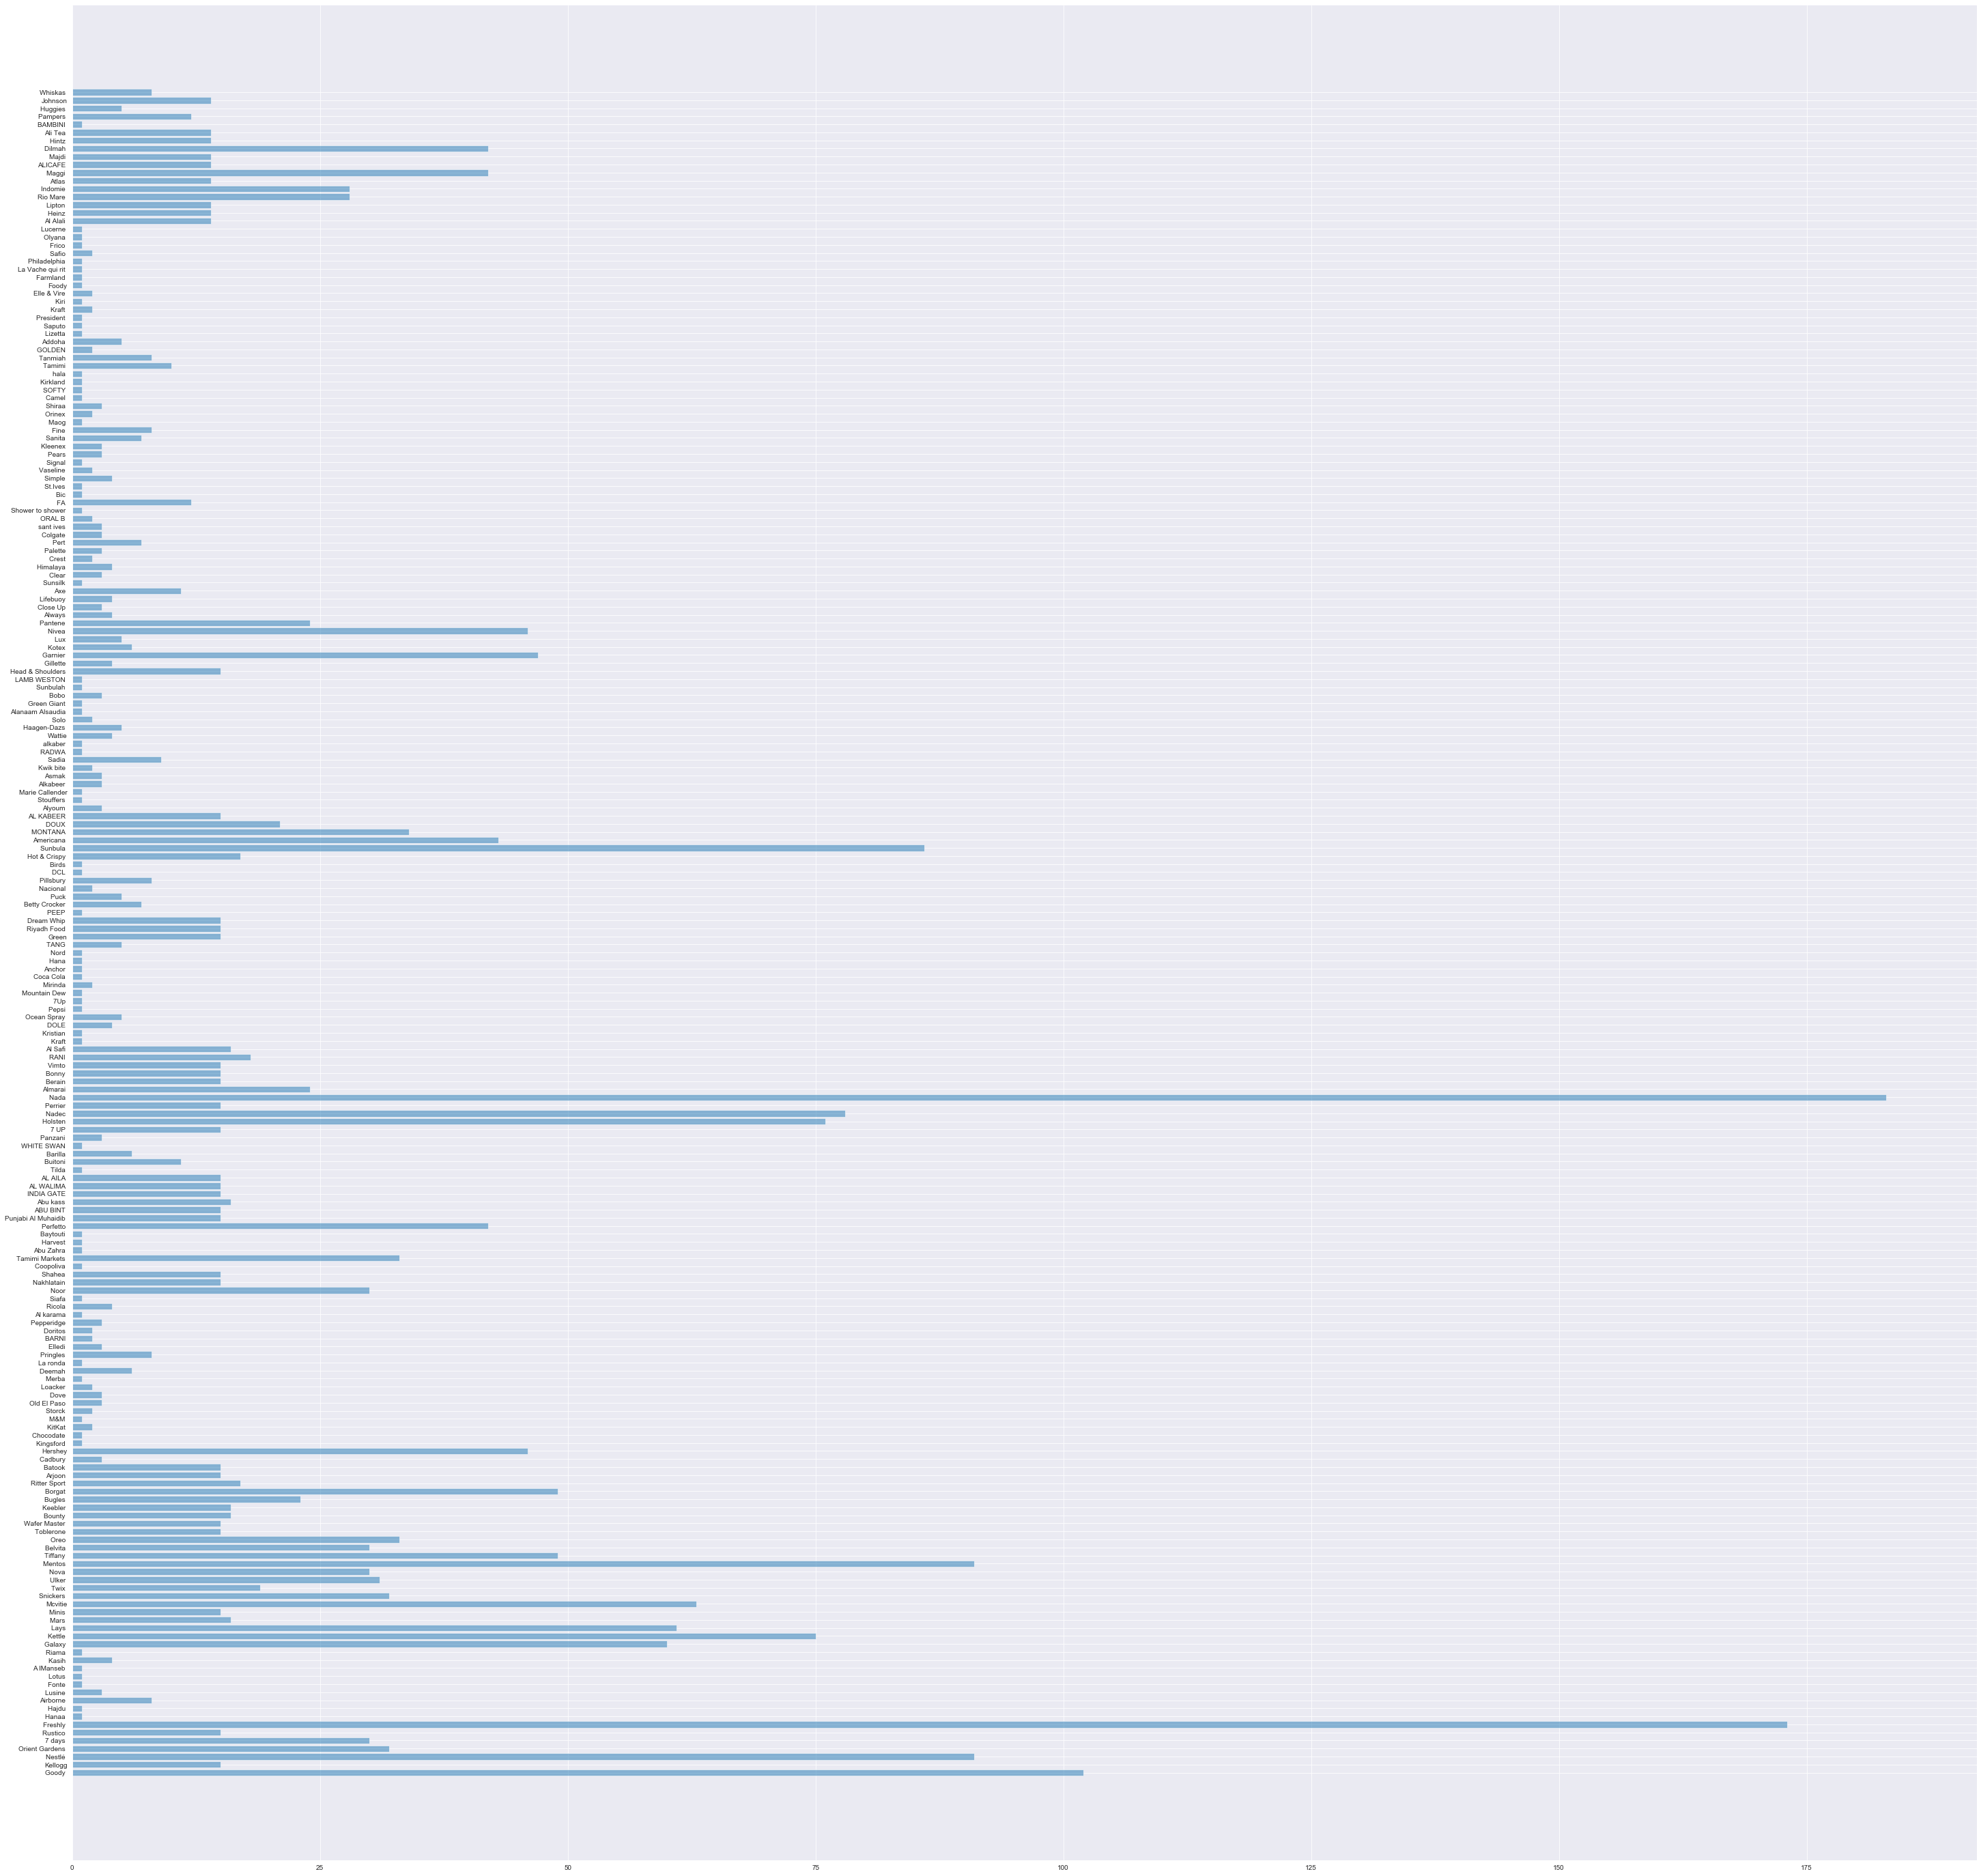

In [35]:
df1 = df[(df['Offer'] != 0) & (df['Brand'] != '')]
brandList={}

for row in df1['Brand']:
    try:
        brandList[row]= brandList[row]+1
    except KeyError:
        brandList[row]=1

        

brand=[]
cou=[]
for key, value in brandList.items():
    aKey = key
    aValue = value
    brand.append(aKey)
    cou.append(aValue)

y_pos = np.arange(len(brand))
plt.figure(figsize=(50, 50))
plt.barh(y_pos, cou, align='center', alpha=0.5)
plt.yticks(y_pos, brand)
plt.show()


#keys =brandList.keys()
#values = brandList.values()
#fig, axs = plt.subplots(1, 1, figsize=(30, 10), sharey=True)
#plt.bar(keys, values )
#plt.ylabel ('Name of Category')
#plt.xlabel ('Count of Offers ')

#plt.show()


4.	What are the average prices of baby products?

In [99]:
df3 = df[df['Category'] == 'baby']
AV=df3['Price'].mean()
print("The average prices of baby products is: ", AV)

The average prices of baby products is:  36.8601562500001


5.	What is the least expensive brand for pet products?

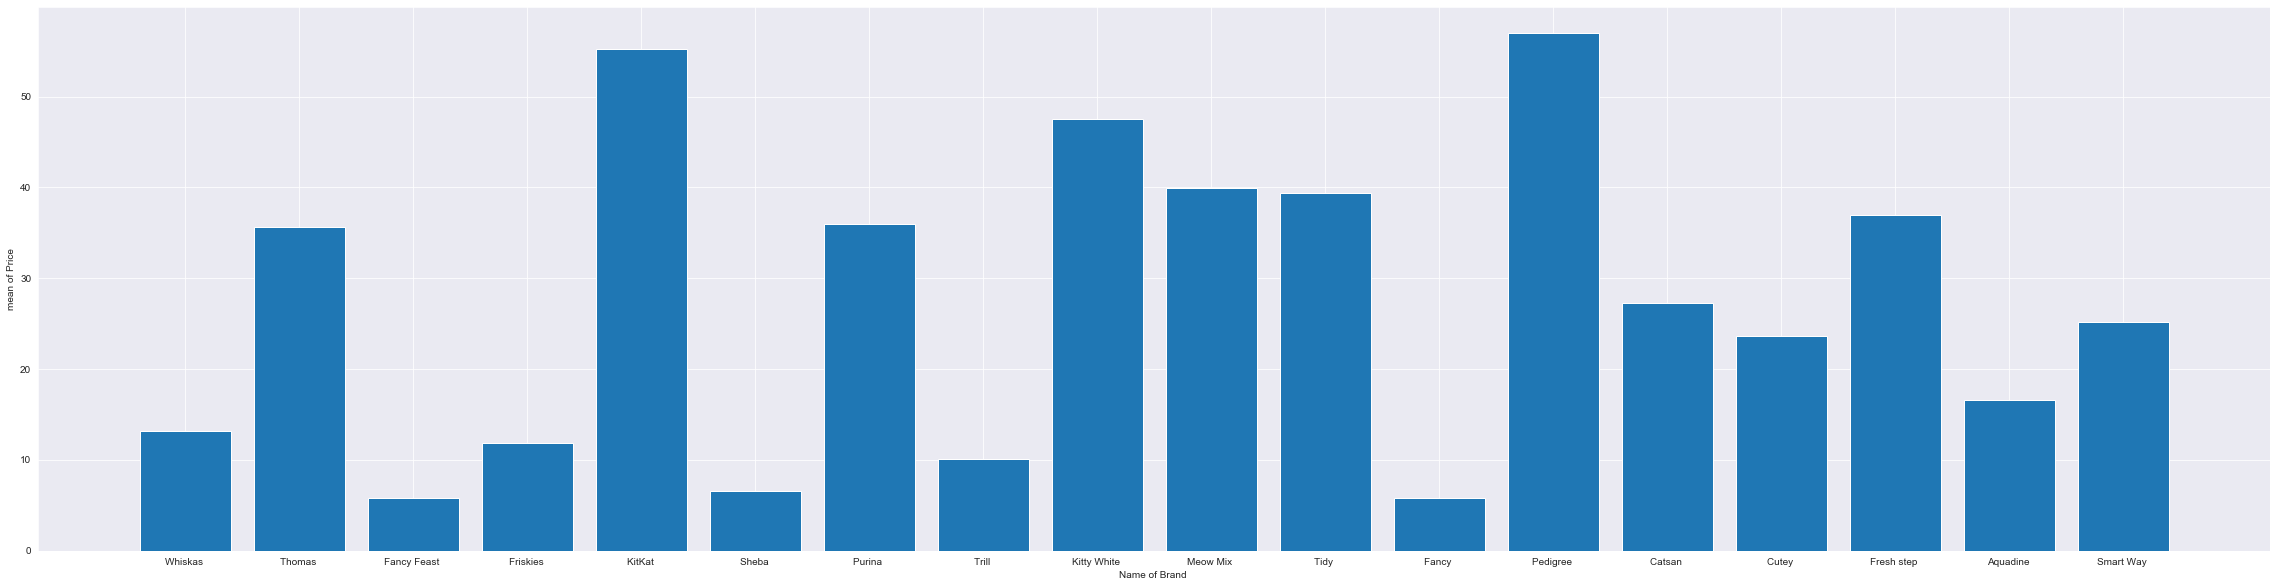

In [127]:
df4 = df[(df['Category'] == 'pets') & (df['Brand'] != '')]

brandList=[]
brandMean={}
for row in df4['Brand']:
    if row in brandList:
        continue 
    brandList.append(row)
      
for x in brandList:
    d = df4[df4['Brand'] == x ]['Price'].mean()
    brandMean[x]=d
brandMean
 
keys =brandMean.keys()
values = brandMean.values()
fig, axs = plt.subplots(1, 1, figsize=(40, 10), sharey=True)
plt.bar(keys, values, )
plt.ylabel ('mean of Price')
plt.xlabel ('Name of Brand ')

plt.show()